In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.13.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

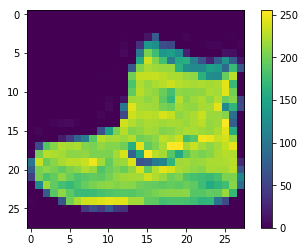

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Preprocess
# Convert all values to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

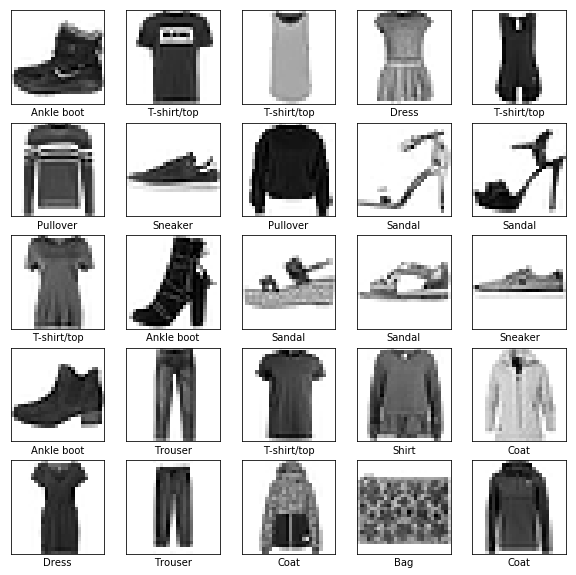

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4948 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3733 - acc: 0.8650
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3344 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3092 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2953 - acc: 0.8911


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.3627 - acc: 0.8686
Test accuracy: 0.8686


In [18]:
predictions = model.predict(test_images)

In [19]:
# show 10 confidence data for first image
predictions[0]

array([7.87733297e-05, 5.97794383e-08, 9.86710234e-07, 5.02234805e-08,
       9.15759074e-07, 1.52487224e-02, 1.13752314e-04, 3.34576033e-02,
       1.36512335e-05, 9.51085448e-01], dtype=float32)

In [20]:
# view highest confidence
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

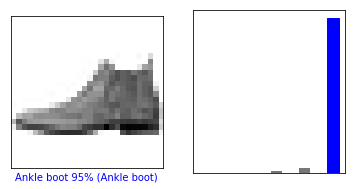

In [23]:
# look at 0th image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

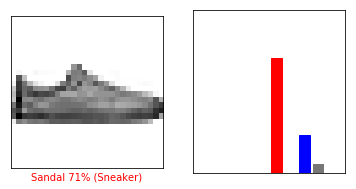

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

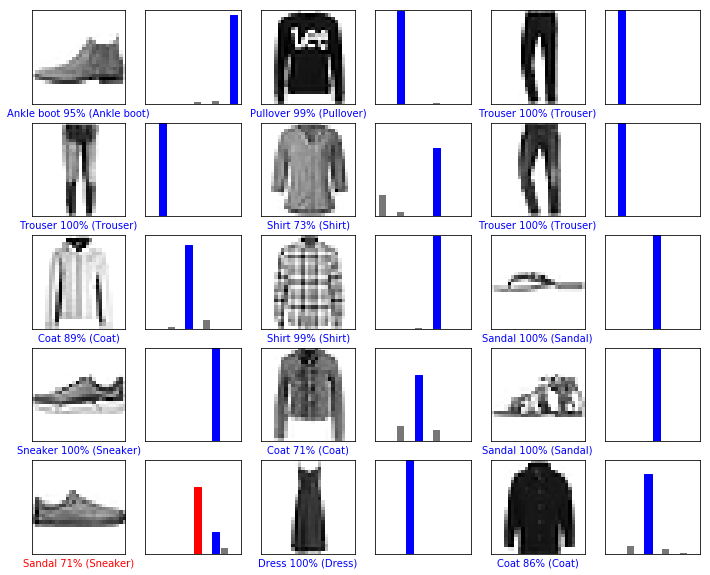

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [26]:
# Grab an image from the test dataset
img = test_images[2]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
# predict single image
predictions_single = model.predict(img)

print(predictions_single)

[[3.5083240e-06 9.9999642e-01 2.0919092e-08 2.5663676e-08 6.5017922e-08
  6.7499950e-16 1.0442100e-08 2.4431840e-17 1.1222395e-11 2.8296118e-13]]


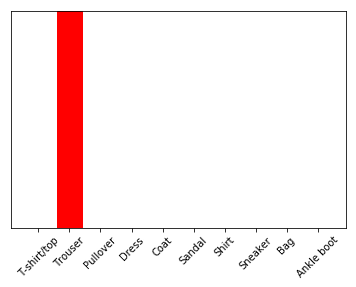

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

1

In [95]:
# try my own images
import os
import cv2

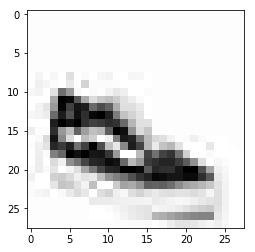

In [140]:
DATADIR = "fashion_imgs"
CATEGORIES = ['sneaker']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to img directories
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img),0) # 0 flag throws out 3-channel
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [141]:
img_array.shape

(28, 28)

In [142]:
img = (np.expand_dims(img_array,0))

print(img.shape)

(1, 28, 28)


In [143]:
# convert to decimals
img_array = img_array / 255.0

# predict single image
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
